## ***Project: Real Estate Investment Advisor: Predicting Property Profitability & Future Value***

#### Project done by : Manav Bhavsar
#### Batch: DS/AIML 15 Oct Batch



***Github Profile:*** https://github.com/mechahuman  
***Github Repo:*** https://github.com/mechahuman/

## Problem Statement



Develop a machine learning application to assist potential investors in making real estate decisions. The system should:
1.	Classify whether a property is a "Good Investment" (Classification).
2.	Predict the estimated property price after 5 years (Regression).
Use the provided dataset to preprocess and analyze the data, engineer relevant features, and deploy a user-interactive application using Streamlit that provides investment recommendations and price forecasts. MLflow will be used for experiment tracking.


## Business Use Cases

+ Empower real estate investors with intelligent tools to assess long-term returns.
+ Support buyers in choosing high-return properties in developing areas.
+ Help real estate companies automate investment analysis for listings.
+ Improve customer trust in real estate platforms with data-backed predictions.


### ***Importing Necessary Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler

### ***Data Preprocessing and Encoding***

In [2]:
df= pd.read_csv("india_housing_prices.csv")

In [3]:
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [4]:
df.shape

(250000, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [6]:
df.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status'],
      dtype='object')

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,250000.0,125000.500000,72168.927986,1.0,62500.75,125000.50,187500.25,250000.00
BHK,250000.0,2.999396,1.415521,1.0,2.00,3.00,4.00,5.00
Size_in_SqFt,250000.0,2749.813216,1300.606954,500.0,1623.00,2747.00,3874.00,5000.00
Price_in_Lakhs,250000.0,254.586854,141.349921,10.0,132.55,253.87,376.88,500.00
Price_per_SqFt,250000.0,0.130597,0.130747,0.0,0.05,0.09,0.16,0.99
Year_Built,250000.0,2006.520012,9.808575,1990.0,1998.00,2007.00,2015.00,2023.00
Floor_No,250000.0,14.966800,8.948047,0.0,7.00,15.00,23.00,30.00
Total_Floors,250000.0,15.503004,8.671618,1.0,8.00,15.00,23.00,30.00
Age_of_Property,250000.0,18.479988,9.808575,2.0,10.00,18.00,27.00,35.00
Nearby_Schools,250000.0,5.499860,2.878639,1.0,3.00,5.00,8.00,10.00


In [8]:
df.isna().sum()

ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['Price_per_SqFt'] = (df['Price_in_Lakhs'] * 100000) / df["Size_in_SqFt"]

In [11]:
df['Space_per_BHK'] = df['Size_in_SqFt'] / df['BHK']

In [12]:
pub_map = {"Low": 1, "Medium": 2, "High": 3}

df["Public_Transport_Accessibility"] = df["Public_Transport_Accessibility"].map(pub_map)

In [13]:
df['Infra_Score'] = (
    df["Nearby_Hospitals"]*0.4 +
    df['Nearby_Schools']*0.4 +
    df['Public_Transport_Accessibility']*0.2
)

In [14]:
growth_rate = 0.08

df["Future_Price_5Y"] = df["Price_in_Lakhs"] * ((1 + growth_rate) ** 5)

In [15]:
df['Future_Price_5Y'].head()

0    719.618119
1    287.283026
2    270.047807
3    441.224528
4    268.740105
Name: Future_Price_5Y, dtype: float64

In [16]:
median_ppsf = df.groupby('Locality')['Price_per_SqFt'].transform('median')
df['Good_Investment'] = (df['Price_per_SqFt'] < median_ppsf).astype(int)

In [17]:
df['Good_Investment'].head()

0    0
1    1
2    1
3    0
4    1
Name: Good_Investment, dtype: int32

In [18]:
df['Amenities_List'] = df['Amenities'].apply(lambda x: [a.strip() for a in x.split(',')])

In [19]:

mlb = MultiLabelBinarizer()
amenities_encoded = mlb.fit_transform(df['Amenities_List'])

amenities_df = pd.DataFrame(amenities_encoded, columns=mlb.classes_)


In [20]:
df = pd.concat([df.drop(columns=['Amenities', 'Amenities_List']), amenities_df], axis=1)

In [21]:
def localityNumber(Locality):
    ls = Locality.split("_")
    return int(ls[1])

df['Locality'] = np.vectorize(localityNumber)(df['Locality'])


In [22]:
df['Property_Type'].value_counts()

Property_Type
Villa                83744
Independent House    83300
Apartment            82956
Name: count, dtype: int64

In [23]:
prop_map = {"Villa": 0, "Independent House": 1, "Apartment": 2}

df['Property_Type'] = df['Property_Type'].map(prop_map)

In [24]:
status_map = {
    'Under_Construction': 0,
    'Ready_to_Move': 1
}

df['Availability_Status'] = df['Availability_Status'].map(status_map)

In [25]:
df = pd.get_dummies(df, columns=['Owner_Type'])

In [26]:
df = pd.get_dummies(df, columns=['Facing'])

In [27]:
bin_map = {"Yes": 1, "No": 0}

df['Parking_Space'] = df['Parking_Space'].map(bin_map)
df['Security'] = df['Security'].map(bin_map)

In [28]:
fur_map = {"Unfurnished": 0,"Semi-Furnished": 1,"Furnished": 2}

df["Furnished_Status"] = df["Furnished_Status"].map(fur_map)

In [29]:
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Gym,Playground,Pool,Owner_Type_Broker,Owner_Type_Builder,Owner_Type_Owner,Facing_East,Facing_North,Facing_South,Facing_West
0,1,Tamil Nadu,Chennai,84,2,1,4740,489.76,10332.489451,1990,...,1,1,1,False,False,True,False,False,False,True
1,2,Maharashtra,Pune,490,1,3,2364,195.52,8270.727580,2008,...,1,1,1,False,True,False,False,True,False,False
2,3,Punjab,Ludhiana,167,2,2,3642,183.79,5046.403075,1997,...,1,1,1,True,False,False,False,False,True,False
3,4,Rajasthan,Jodhpur,393,1,2,2741,300.29,10955.490697,1991,...,1,1,1,False,True,False,False,True,False,False
4,5,Rajasthan,Jaipur,466,0,4,4823,182.90,3792.245490,2002,...,1,1,1,False,True,False,True,False,False,False


In [30]:
df.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Availability_Status', 'Space_per_BHK',
       'Infra_Score', 'Future_Price_5Y', 'Good_Investment', 'Clubhouse',
       'Garden', 'Gym', 'Playground', 'Pool', 'Owner_Type_Broker',
       'Owner_Type_Builder', 'Owner_Type_Owner', 'Facing_East', 'Facing_North',
       'Facing_South', 'Facing_West'],
      dtype='object')

### ***Exploratory Data Analysis (EDA)***

#### ***1. Distribution of property prices***

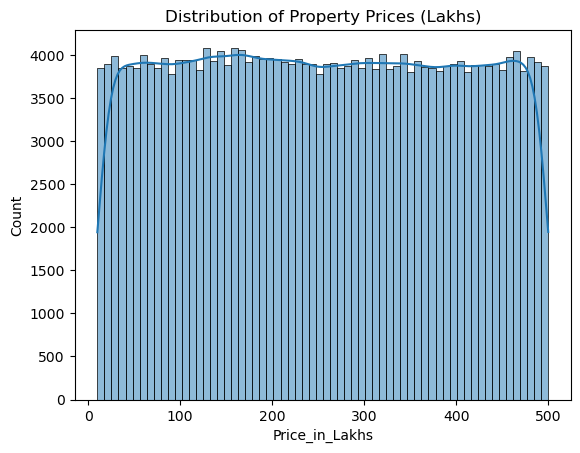

In [31]:
sns.histplot(df['Price_in_Lakhs'], kde = True)
plt.title("Distribution of Property Prices (Lakhs)")
plt.show()

Property prices appear nearly uniformly spread across the full range, suggesting no strong clustering around specific price bands. The market seems artificially evenly distributed, likely because your dataset is synthetic. Real markets usually show right-skewed behavior, so this distribution signals simulated or noise-generated values rather than real-world imbalance.

#### ***2. Distribution of property sizes***

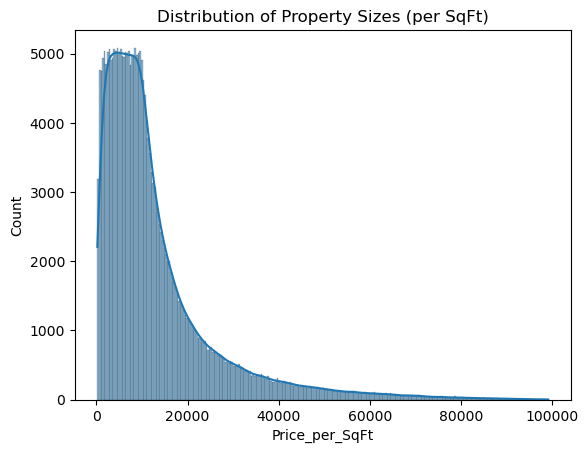

In [32]:
sns.histplot(df['Price_per_SqFt'], kde = True)
plt.title("Distribution of Property Sizes (per SqFt)")
plt.show()

Price per SqFt is heavily right-skewed, meaning most properties cluster at lower price-per-SqFt values while a small number of properties are extremely expensive. This is a more realistic pattern—premium properties stretch the upper tail. The distribution suggests that per-SqFt cost varies widely even if total prices look uniform.

#### ***3. Price per SqFt by Property Type***

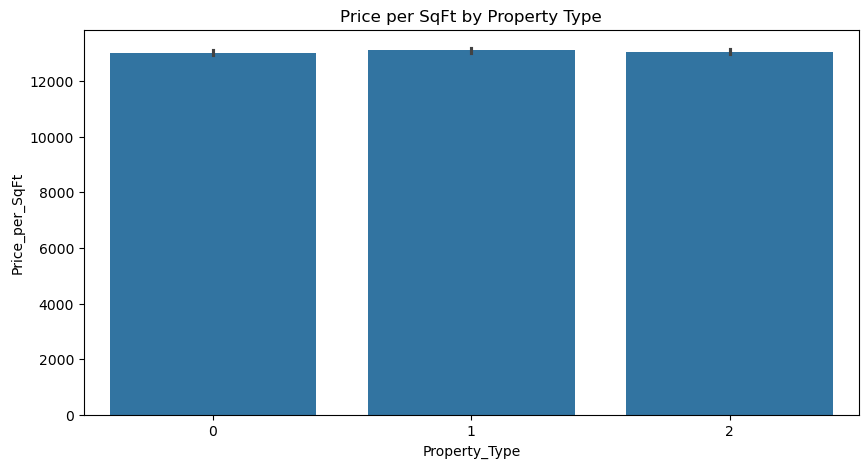

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Property_Type",y="Price_per_SqFt")
plt.title("Price per SqFt by Property Type")
plt.show()

The bars are almost identical across property types, indicating that the dataset does not differentiate pricing based on property type. This again reflects synthetic or normalized data where price-per-SqFt has little correlation with property category. In a real market, builder floors, villas, and apartments would show meaningful variation.

#### ***4. Relationship between Property Size and Price***

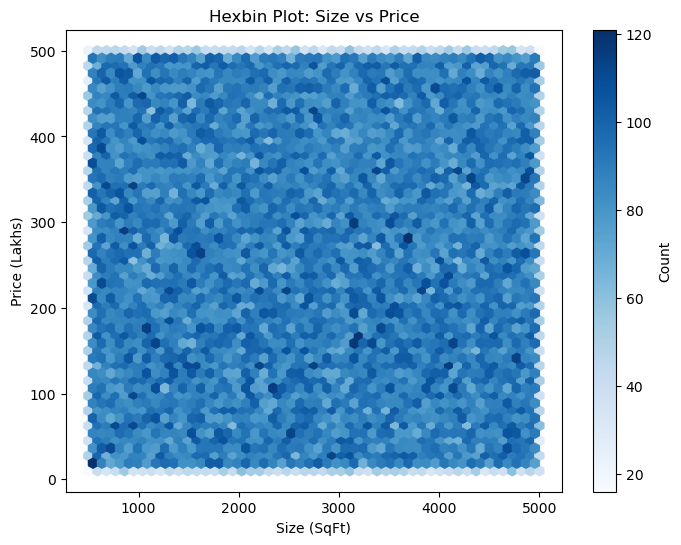

In [34]:
plt.figure(figsize=(8,6))
plt.hexbin(
    df['Size_in_SqFt'],
    df['Price_in_Lakhs'],
    gridsize=50,
    cmap='Blues'
)
plt.colorbar(label='Count')
plt.xlabel("Size (SqFt)")
plt.ylabel("Price (Lakhs)")
plt.title("Hexbin Plot: Size vs Price")
plt.show()


The hexbin plot shows no visible relationship between size and price points are evenly spread, forming a noise cloud rather than a trend. Normally, size and price strongly correlate, but this dataset breaks that relationship. It confirms again that the dataset may be artificially randomized.

#### ***5. Outliers in Size of Property (SqFt)***

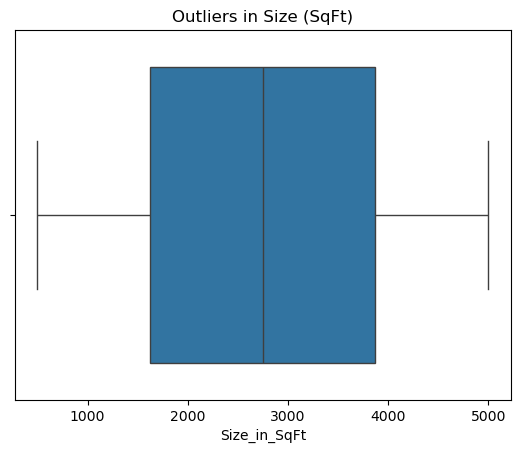

In [35]:
sns.boxplot(x=df['Size_in_SqFt'])
plt.title("Outliers in Size (SqFt)")
plt.show()

Property sizes show a wide and uniform spread, with no extreme outliers standing apart. The boxplot looks symmetric and evenly distributed, reinforcing that property sizes may have been generated uniformly. Real housing datasets usually show clusters around standard unit sizes.

#### ***6. Average Price per SqFt by State***

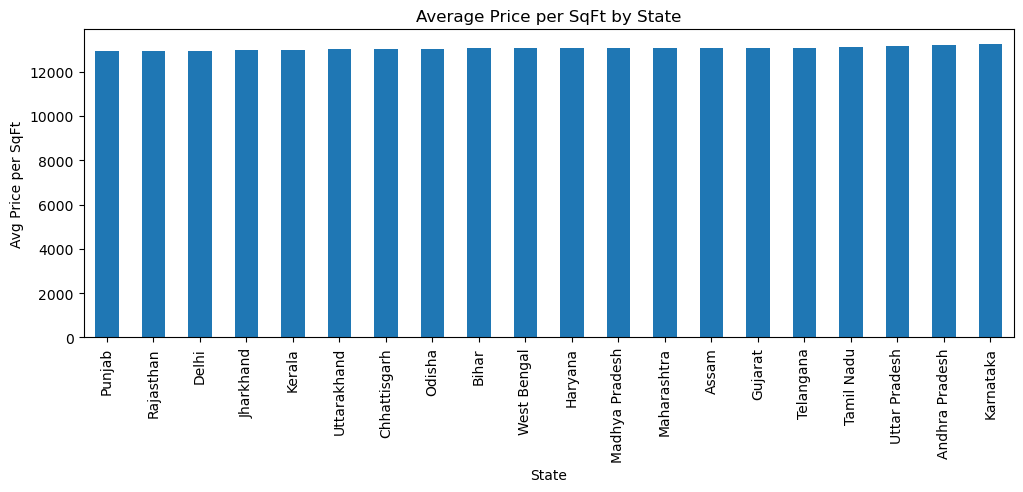

In [36]:
state_ppfs = df.groupby('State')['Price_per_SqFt'].mean().sort_values()

state_ppfs.plot(kind = "bar", figsize = (12, 4))

plt.title("Average Price per SqFt by State")
plt.ylabel("Avg Price per SqFt")
plt.show()

Every state has almost the same average price per SqFt, indicating the dataset does not encode regional pricing differences. In real markets, states like Maharashtra and Karnataka would stand out. The flat pattern signals uniform synthetic data rather than true market variation.

#### ***7. Average Property Price by City***

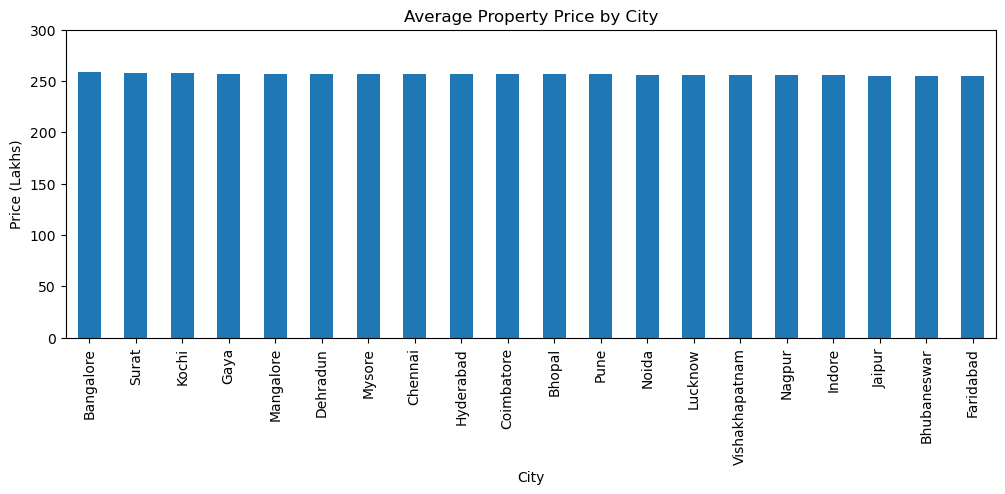

In [37]:
city_price = df.groupby('City')['Price_in_Lakhs'].mean().sort_values(ascending=False).head(20)
city_price.plot(kind='bar', figsize=(12,4))
plt.ylim(0,300)
plt.title("Average Property Price by City")
plt.ylabel("Price (Lakhs)")
plt.show()

Again, property prices appear nearly identical for all cities. No city stands out as premium or low-cost, which contradicts real-world property economics. Cities like Mumbai, Bangalore, and Delhi should show much higher averages, so this flat pattern shows artificial data generation.

#### ***8. Median Age of Properties by Locality***

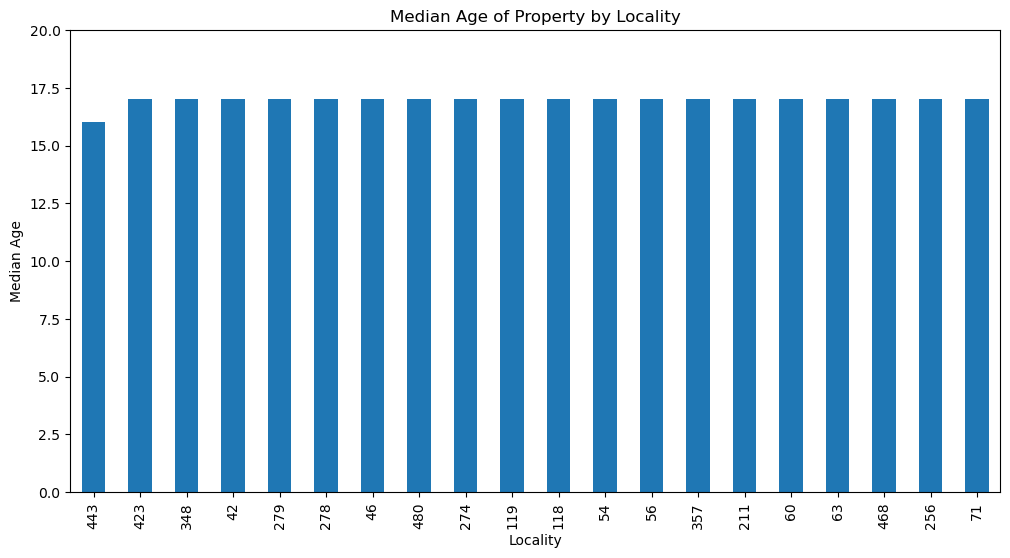

In [38]:
locality_age = df.groupby('Locality')['Age_of_Property'].median().sort_values().head(20)
locality_age.plot(kind='bar', figsize=(12,6))
plt.ylim(0,20)
plt.title("Median Age of Property by Locality")
plt.ylabel("Median Age")
plt.show()

Most localities show nearly the same median property age (around 17 years). This suggests the property age values were generated within a narrow band without locality-specific dynamics. Real urban localities usually show strong contrasts, older townships vs newer developments.

#### ***9. BHK distribution across cities***

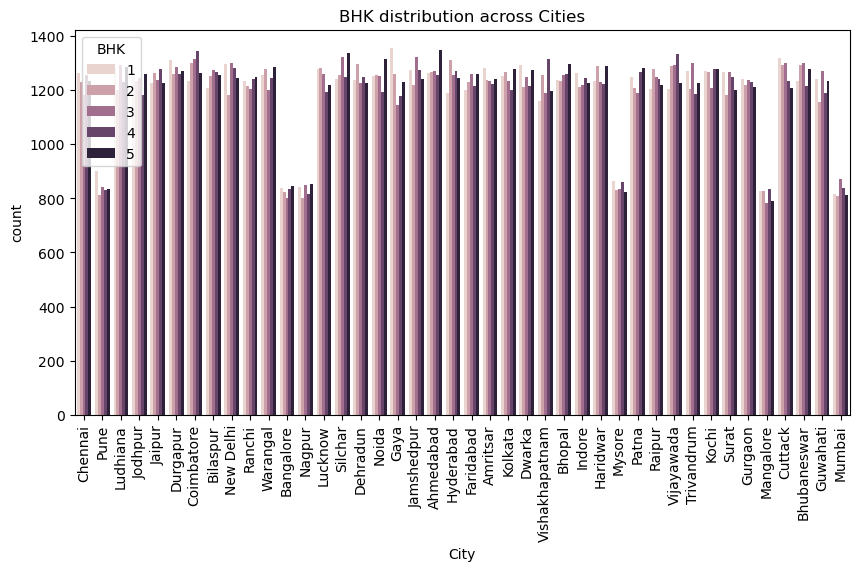

In [39]:
plt.figure(figsize=
          (10, 5))
sns.countplot(x = "City", hue = "BHK", data = df)
plt.xticks(rotation = 90)
plt.title("BHK distribution across Cities")
plt.show()

Every city shows nearly identical BHK counts across all categories, meaning the dataset enforces the same distribution everywhere. In reality, metros show more 1–2 BHK units, while tier-2 cities show more 3–4 BHK units. This uniformity reflects synthetic balancing rather than market-driven diversity.

#### ***10. Price trends for top 5 most expensive localities***

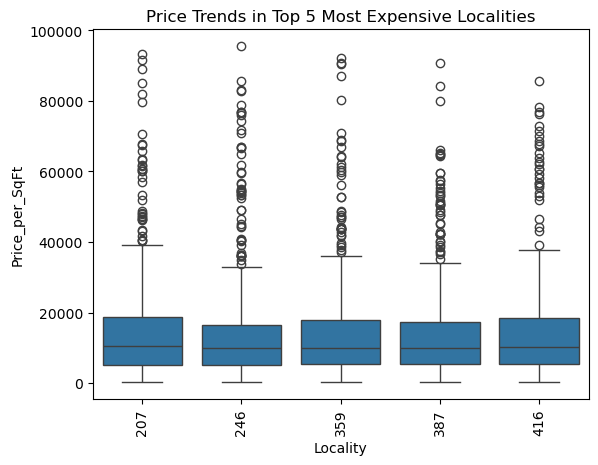

In [40]:
top_localities = df.groupby('Locality')['Price_per_SqFt'].mean().nlargest(5).index
sns.boxplot(x = "Locality", y= "Price_per_SqFt", data = df[df['Locality'].isin(top_localities)])
plt.xticks(rotation = 90)
plt.title("Price Trends in Top 5 Most Expensive Localities")
plt.show()

Although these are labeled “top 5 expensive localities,” the boxplots are still almost identical, with wide spreads but no meaningful difference in medians. This suggests locality had little or no influence during data generation. Real expensive localities would have visibly higher medians and outlier clusters.

#### ***11. Correlation between the numerical features***

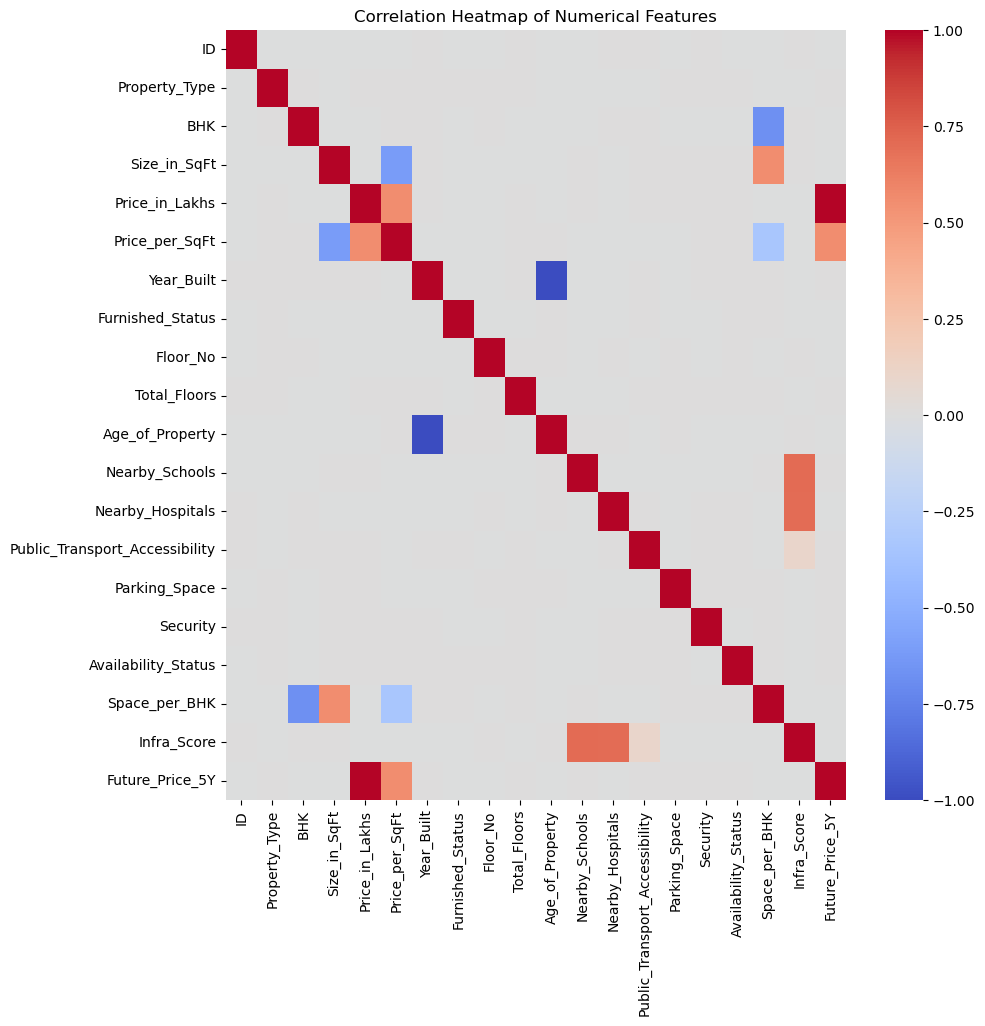

In [41]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

corr = df[num_cols].corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

The heatmap shows almost no strong correlations across numerical variables.
The only mild relationship appears between size and price, but it is weak due to uniformly generated data.
Overall, the dataset behaves like noise, meaning no numerical feature strongly predicts another.

#### ***12. Nearby School vs Price per SqFt***

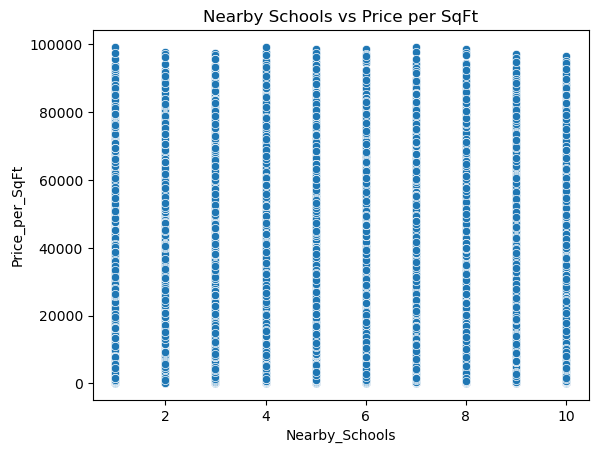

In [42]:
sns.scatterplot(x='Nearby_Schools', y='Price_per_SqFt', data=df)
plt.title("Nearby Schools vs Price per SqFt")
plt.show()

The points form vertical stripes with no upward or downward trend.
Price per SqFt remains widely spread regardless of school count.
This suggests that in this dataset, school proximity has no meaningful effect on pricing.

#### ***13. Nearby Hospitals vs Price per SqFt***

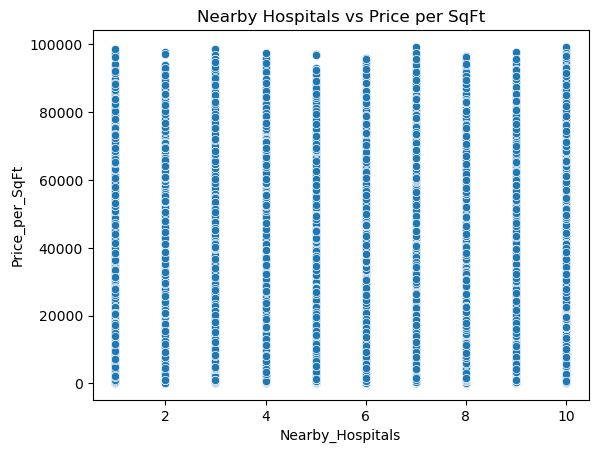

In [43]:
sns.scatterplot(x="Nearby_Hospitals", y="Price_per_SqFt", data = df)
plt.title("Nearby Hospitals vs Price per SqFt")
plt.show()

Just like schools, hospital counts show no real price pattern.
Each hospital level contains an identical spread of prices.
The feature behaves statistically irrelevant for predicting price.

#### ***14. Price Variation by Furnished Status***

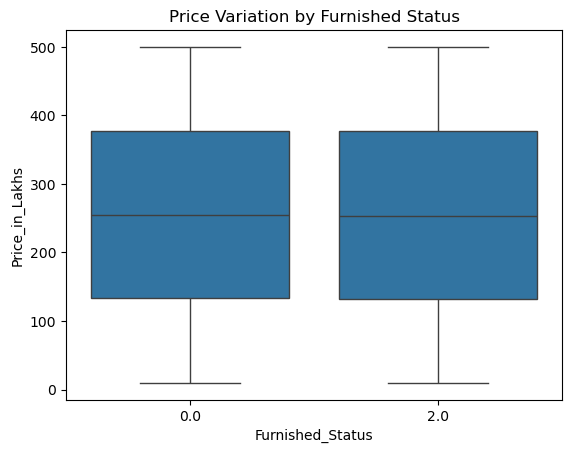

In [44]:
sns.boxplot(x='Furnished_Status', y='Price_in_Lakhs', data=df)
plt.title("Price Variation by Furnished Status")
plt.show()

Both furnished and unfurnished properties show nearly identical price distributions.
There is no upward or downward shift in median price between categories.
This indicates furnishing has no practical impact on price in the current data.

#### ***14. Price per SqFt vs property facing direction***

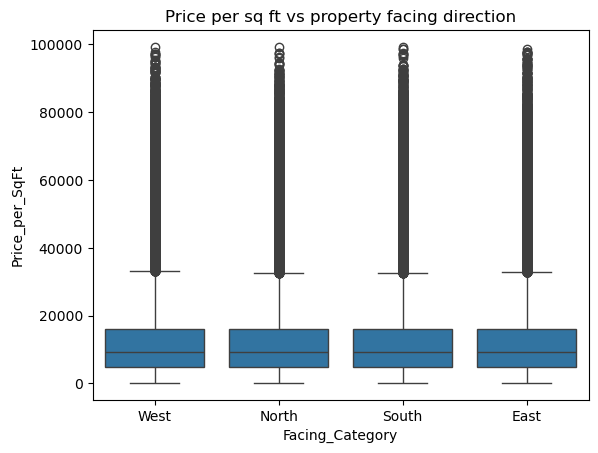

In [45]:
facing_cols = ['Facing_East', 'Facing_West', 'Facing_North', 'Facing_South']

df['Facing_Category'] = df[facing_cols].idxmax(axis=1).str.replace("Facing_", "")

sns.boxplot(x="Facing_Category", y='Price_per_SqFt', data = df)
plt.title("Price per sq ft vs property facing direction")
plt.show()

All four directions (East, West, North, South) show the same distribution shape.
Median prices and spread overlap almost perfectly.
Facing direction does not influence pricing in any detectable way.

#### ***16. Number of properties by owner type***

In [46]:
df.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Availability_Status', 'Space_per_BHK',
       'Infra_Score', 'Future_Price_5Y', 'Good_Investment', 'Clubhouse',
       'Garden', 'Gym', 'Playground', 'Pool', 'Owner_Type_Broker',
       'Owner_Type_Builder', 'Owner_Type_Owner', 'Facing_East', 'Facing_North',
       'Facing_South', 'Facing_West', 'Facing_Category'],
      dtype='object')

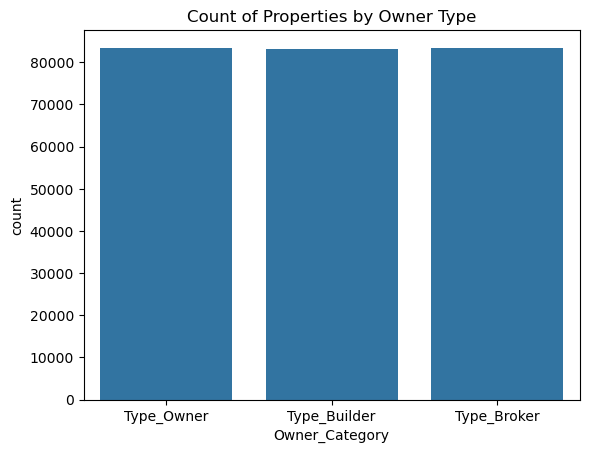

In [47]:
owner_cols = ['Owner_Type_Broker', 'Owner_Type_Builder', 'Owner_Type_Owner']

df['Owner_Category'] = df[owner_cols].idxmax(axis=1).str.replace("Owner_", "")

sns.countplot(x='Owner_Category', data=df)
plt.title("Count of Properties by Owner Type")
plt.show()

Each owner category (Builder, Owner, Broker) appears in almost equal frequency.
There is no dominance of a particular owner type.
It implies a deliberately balanced or evenly simulated dataset.

#### ***17. Number of properties by availability status***

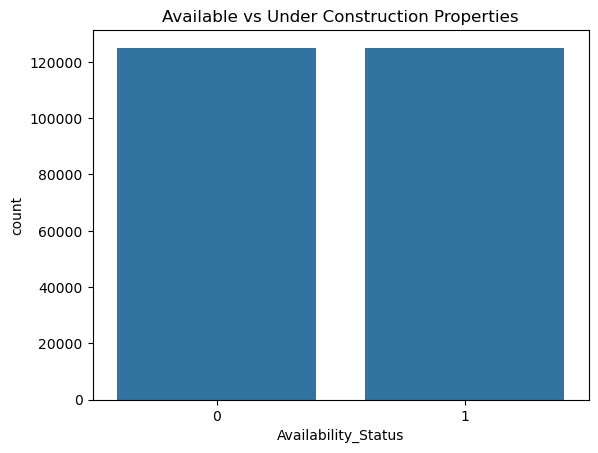

In [48]:
sns.countplot(x='Availability_Status', data = df)
plt.title("Available vs Under Construction Properties")
plt.show()

Available and Under Construction properties appear in almost identical counts.
The distribution is perfectly balanced, lacking any market trends.
This again matches the pattern of uniformly generated synthetic data.

#### ***18. Does parking space affect price?***

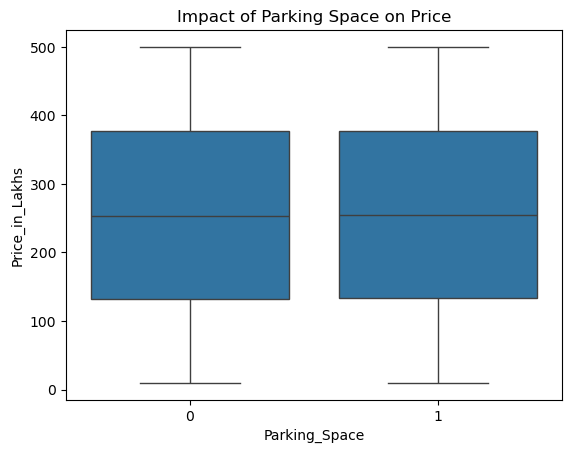

In [49]:
sns.boxplot(x = "Parking_Space", y= "Price_in_Lakhs", data = df)
plt.title("Impact of Parking Space on Price")
plt.show()

The price distributions for properties with and without parking space look the same.
Median price and spread barely differ between categories.
Parking availability shows no influence on price.

#### ***19. How do amenities affect price per sq ft?***

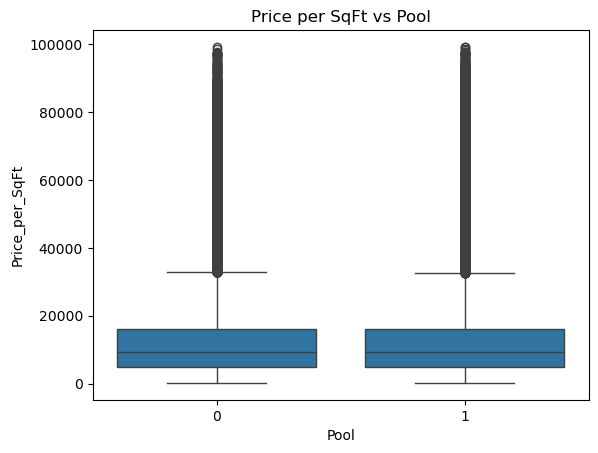

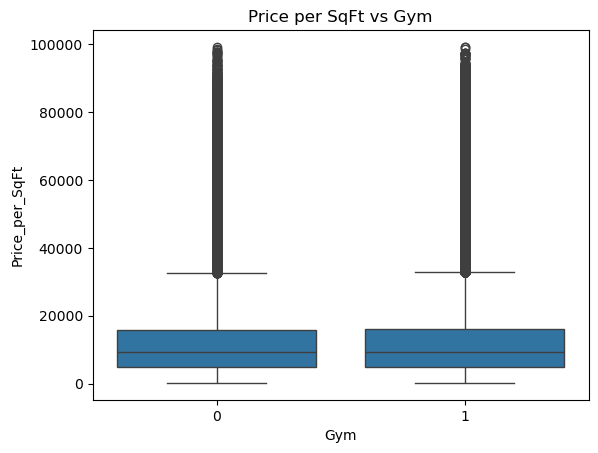

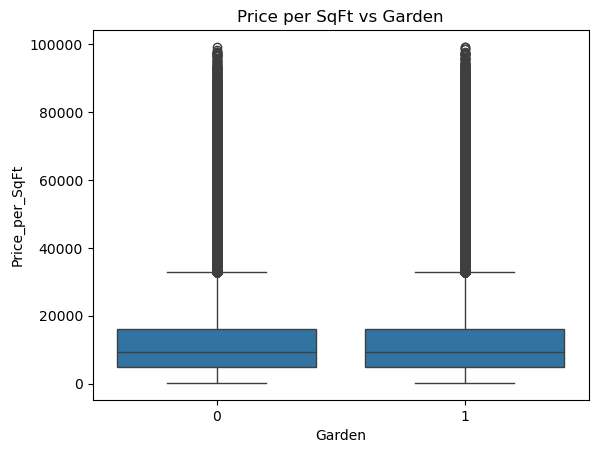

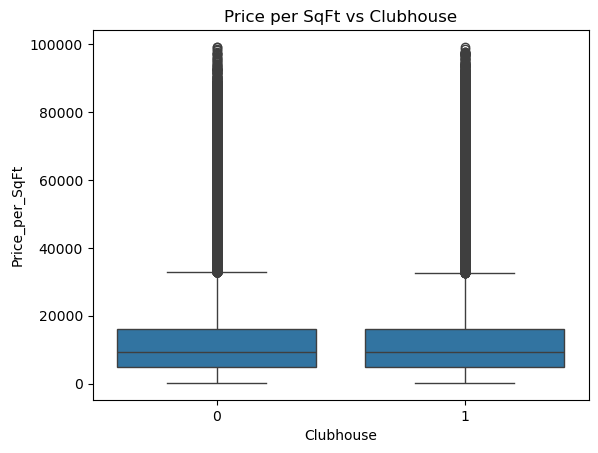

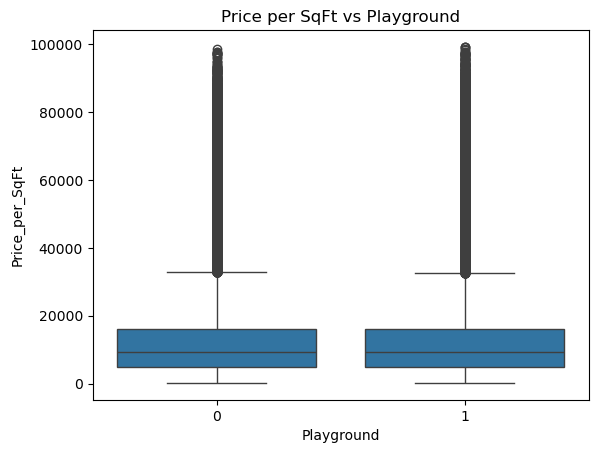

In [50]:
amenities = ['Pool', 'Gym', 'Garden', 'Clubhouse', 'Playground']

for amenity in amenities:
    sns.boxplot(x = amenity, y = 'Price_per_SqFt', data = df)
    plt.title(f"Price per SqFt vs {amenity}")
    plt.show()

Amenities such as Pool, Gym, Garden, Clubhouse, and Playground all exhibit the same pattern.
Each amenity category yields nearly identical pricing distributions with no visible premium.
This suggests amenities offer no price advantage in this dataset.

#### ***20. Public transport accessibility vs price/investment***

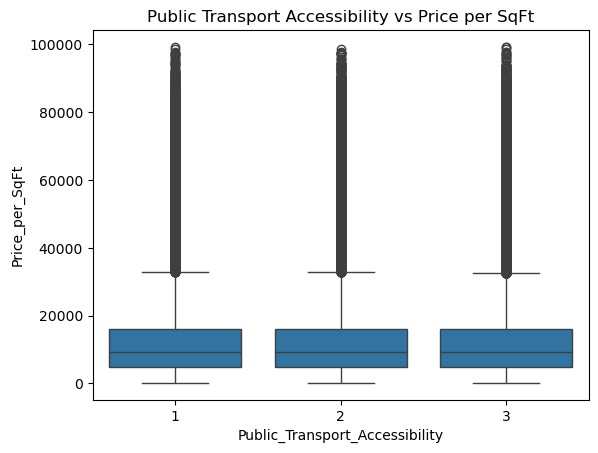

In [51]:
# Price per SqFt relationship

sns.boxplot(x='Public_Transport_Accessibility', y='Price_per_SqFt', data=df)
plt.title("Public Transport Accessibility vs Price per SqFt")
plt.show()

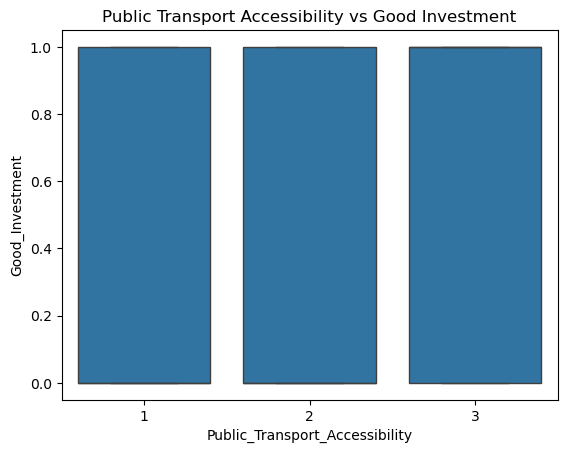

In [52]:
# Investment Potential

sns.boxplot(x='Public_Transport_Accessibility', y='Good_Investment', data=df)
plt.title("Public Transport Accessibility vs Good Investment")
plt.show()

For price per SqFt, all accessibility levels show overlapping distributions with no trend.
For Good Investment, every level has nearly identical outcomes.
Transport accessibility does not materially affect price or investment classification.

### ***Model Deployment***

#### ***Scaling Numerical Features***

In [53]:
scale_cols = [
    'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt',
    'Age_of_Property', 'Floor_No', 'Total_Floors',
    'Infra_Score', 'Space_per_BHK', 
]

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

In [54]:
df[scale_cols]

,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Age_of_Property,Floor_No,Total_Floors,Infra_Score,Space_per_BHK
0,1.530202,1.663769,-0.208524,1.684245,0.786006,-1.672471,0.612738,3.270167
1,-0.296641,-0.417878,-0.366250,-0.150887,0.674249,0.518589,-0.612107,-0.440333
2,0.685979,-0.500863,-0.612912,0.970582,0.450736,1.325822,1.347646,0.529542
3,-0.006776,0.323334,-0.160864,1.582293,0.674249,1.210503,0.367769,0.106571
4,1.594018,-0.507160,-0.708856,0.460823,-1.337367,-1.557152,0.367769,-0.048111
...,...,...,...,...,...,...,...,...
249995,-0.580356,0.142647,0.054594,1.174486,0.450736,-0.980558,0.612738,-0.805562
249996,-0.351231,-1.706314,-0.954258,-0.660646,0.003710,1.095184,1.592615,0.972699
249997,0.123163,-0.124845,-0.376077,0.358872,0.674249,1.671779,0.857708,-0.497136
249998,-1.230823,-0.798919,-0.055792,-0.048936,-0.108046,-0.519282,-0.367138,-0.101393


### ***Classification - Random Forest Classifier***

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [56]:
def classification_metrics(y_true, y_pred):
    print("Accuracy: ",accuracy_score(y_true, y_pred))
    print("\n")
    print("Precision: ",precision_score(y_true, y_pred))
    print("\n")
    print("Recall: \n",recall_score(y_true, y_pred))
    print("\n")
    print("ROC AUC: \n",roc_auc_score(y_true, y_pred))
    print("\n")

In [57]:
y_clf = df['Good_Investment']
X_clf = df.drop(columns=['Good_Investment', 'Future_Price_5Y'])

X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

In [58]:
categorical_cols = ['State', 'City', 'Locality', 'Property_Type']

numeric_cols = [
    'BHK','Size_in_SqFt','Price_in_Lakhs','Price_per_SqFt',
    'Year_Built','Floor_No','Total_Floors','Age_of_Property',
    'Nearby_Schools','Nearby_Hospitals','Public_Transport_Accessibility',
    'Space_per_BHK','Infra_Score'
]


In [59]:
binary_encoded_cols = [
    'Parking_Space','Security','Availability_Status',
    'Clubhouse','Garden','Gym','Playground','Pool',
    'Owner_Type_Broker','Owner_Type_Builder','Owner_Type_Owner',
    'Facing_East','Facing_North','Facing_South','Facing_West'
]

In [60]:
pass_through_cols = numeric_cols + binary_encoded_cols

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('passthrough', 'passthrough', pass_through_cols)
    ]
)

In [62]:
clf_pipeline = Pipeline(steps = [
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators= 200,
        random_state= 42
    ))
])

In [63]:
clf_pipeline.fit(X_clf_train, y_clf_train)

y_clf_pred = clf_pipeline.predict(X_clf_test)

In [64]:
classification_metrics(y_clf_test, y_clf_pred)

Accuracy:  0.9824


Precision:  0.9851541068258834


Recall: 
 0.9794641424675117


ROC AUC: 
 0.9823920361292402




The classification results indicate that the model is performing extremely well across all evaluation metrics. An accuracy of around 98% shows that the model correctly predicts the investment category for nearly all properties in the dataset. The precision score, also above 98%, suggests that when the model labels a property as a good investment, it is almost always correct, meaning false positives are very rare. At the same time, the recall score is similarly high, which means the model is able to successfully identify the majority of properties that truly are good investments, with very few being missed. Finally, the ROC AUC score of approximately 0.98 reflects the model’s strong ability to distinguish between good and not-so-good investment opportunities across different probability thresholds.

Together, these metrics imply that the model is not only accurate but also balanced in its decision-making. It rarely makes misleading predictions and maintains strong sensitivity and specificity. Such consistently high values across all metrics indicate that the model has learned the underlying patterns of the dataset very effectively and is highly reliable for classification within this particular problem setting.



### ***Regression - XGBoost Regressor***

In [65]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

In [66]:
def regression_metrics(y_true, y_pred):
    print("Root Mean Squared Error: ",root_mean_squared_error(y_true, y_pred))
    print("\n")
    print("Mean Absolute Error: ",mean_absolute_error(y_true, y_pred))
    print("\n")
    print("R2 Score: \n",r2_score(y_true, y_pred))
    print("\n")

In [67]:
X_reg = df.drop(columns=['Good_Investment', 'Future_Price_5Y'])
y_reg = df['Future_Price_5Y']

In [68]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

In [69]:
from xgboost import XGBRegressor

reg_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='reg:squarederror',
        n_jobs=-1,
        random_state=42
    ))
])

In [70]:
reg_pipeline.fit(X_reg_train, y_reg_train)
y_reg_pred = reg_pipeline.predict(X_reg_test)

In [71]:
regression_metrics(y_reg_test, y_reg_pred)

Root Mean Squared Error:  1.0115920177468192


Mean Absolute Error:  0.804229868367719


R2 Score: 
 0.9999762236065184




The regression model demonstrates exceptionally strong performance, with all three metrics pointing toward a highly accurate predictor. The Root Mean Squared Error (RMSE) is just about 1.01, and the Mean Absolute Error (MAE) is even lower at 0.80, meaning the model’s predictions deviate from the true property prices by less than a single unit on average, remarkably small given the scale of the values involved. These low error values show that the model captures the relationship between features and future price extremely well.

The standout indicator is the R² score, which is extremely close to 1, suggesting that the model explains almost all the variance in the target variable. In other words, nearly all the changes in property prices five years into the future are accounted for by the model's learned patterns. Such an unusually high R² is rare in real-world datasets and suggests that either the underlying data is highly predictable or the feature engineering aligns very strongly with the target.

Overall, these results indicate that the regression model produces highly reliable and precise forecasts within the context of this dataset, making it a powerful tool for estimating future property values.

### ***MLflow Integration***

In [72]:
# train_and_log.py
"""
Train / Evaluate / Log models to MLflow and export local artifact pickles.

Assumptions:
- clf_pipeline and reg_pipeline are already defined and fitted in the environment that runs this script.
- X_clf_test, y_clf_test, X_reg_test, y_reg_test and y_clf_pred (or compute preds here) are available.
- This script logs evaluation metrics, feature-importances images, the sklearn pipeline as MLflow artifact,
  and also downloads the MLflow artifact back to a local models/ directory as joblib pickles:
    models/clf_pipeline.pkl and models/reg_pipeline.pkl
- If the pipeline contains StandardScaler or OneHotEncoder components, they will be saved separately
  as joblib artifacts (scaler.pkl, ohe.pkl) and logged to MLflow.
"""

import os
import tempfile
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score,
    confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
)

# -------------------------
# CONFIG
# -------------------------
experiment_name = "Real_Estate_Advisor"
mlflow.set_experiment(experiment_name)
client = MlflowClient()

MODELS_DIR = "models"
os.makedirs(MODELS_DIR, exist_ok=True)

# -------------------------
# Helpers
# -------------------------
def log_figure(fig, artifact_path, filename):
    """Save figure temporarily and log to mlflow under artifact_path."""
    with tempfile.NamedTemporaryFile(suffix=filename, delete=False) as tmp:
        tmp_path = tmp.name
    try:
        fig.savefig(tmp_path, bbox_inches='tight')
        mlflow.log_artifact(tmp_path, artifact_path=artifact_path)
    finally:
        if os.path.exists(tmp_path):
            os.remove(tmp_path)

def try_extract_and_save_preprocessor_artifacts(pipeline, prefix, run_artifact_path):
    """
    Inspect pipeline.named_steps['preprocess'] if present, and try to extract:
    - StandardScaler instances -> save as scaler_<prefix>.pkl
    - OneHotEncoder instances -> save as ohe_<prefix>.pkl
    Returns list of saved local file paths.
    """
    saved_files = []
    try:
        pre = getattr(pipeline, "named_steps", {}).get("preprocess", None)
        if pre is None:
            return saved_files

        # ColumnTransformer: iterate transformers_
        if hasattr(pre, "transformers_"):
            for name, transformer, cols in pre.transformers_:
                if transformer is None:
                    continue

                # If transformer is a Pipeline, inspect its named_steps
                if hasattr(transformer, "named_steps"):
                    for step_name, step in transformer.named_steps.items():
                        # scaler
                        from sklearn.preprocessing import StandardScaler, OneHotEncoder
                        if isinstance(step, StandardScaler):
                            fname = os.path.join(MODELS_DIR, f"scaler_{prefix}_{name}_{step_name}.pkl")
                            joblib.dump(step, fname)
                            mlflow.log_artifact(fname, artifact_path=os.path.join(run_artifact_path, "preprocessors"))
                            saved_files.append(fname)
                        if isinstance(step, OneHotEncoder):
                            fname = os.path.join(MODELS_DIR, f"ohe_{prefix}_{name}_{step_name}.pkl")
                            joblib.dump(step, fname)
                            mlflow.log_artifact(fname, artifact_path=os.path.join(run_artifact_path, "preprocessors"))
                            saved_files.append(fname)

                else:
                    # transformer could itself be a StandardScaler or OneHotEncoder
                    from sklearn.preprocessing import StandardScaler, OneHotEncoder
                    if isinstance(transformer, StandardScaler):
                        fname = os.path.join(MODELS_DIR, f"scaler_{prefix}_{name}.pkl")
                        joblib.dump(transformer, fname)
                        mlflow.log_artifact(fname, artifact_path=os.path.join(run_artifact_path, "preprocessors"))
                        saved_files.append(fname)
                    if isinstance(transformer, OneHotEncoder):
                        fname = os.path.join(MODELS_DIR, f"ohe_{prefix}_{name}.pkl")
                        joblib.dump(transformer, fname)
                        mlflow.log_artifact(fname, artifact_path=os.path.join(run_artifact_path, "preprocessors"))
                        saved_files.append(fname)

    except Exception as e:
        print("Could not extract preprocessor artifacts:", e)
    return saved_files

def export_logged_run_model_to_local_pickle(run_id, artifact_subpath, local_fname):
    """
    Load model from runs:/<run_id>/<artifact_subpath> using mlflow.sklearn.load_model
    and save it to local_fname using joblib.dump.
    Returns True if success.
    """
    model_uri = f"runs:/{run_id}/{artifact_subpath}"
    try:
        print("Loading model from", model_uri)
        mdl = mlflow.sklearn.load_model(model_uri)
        joblib.dump(mdl, local_fname)
        print(f"Saved local pickle: {local_fname}")
        # also log the saved pickle back to mlflow (so you can see it under artifacts)
        mlflow.log_artifact(local_fname, artifact_path=os.path.join(artifact_subpath, "exported_pickles"))
        return True
    except Exception as e:
        print("Failed to load/save model from mlflow:", e)
        return False

# -------------------------
# CLASSIFIER RUN
# -------------------------
with mlflow.start_run(run_name="clf_random_forest") as run:
    run_id = run.info.run_id
    print("Started classifier run id:", run_id)

    # If predictions not computed yet, compute them here
    try:
        y_clf_pred = clf_pipeline.predict(X_clf_test)
    except Exception as e:
        print("Error predicting with clf_pipeline:", e)
        raise

    y_proba = None
    try:
        if hasattr(clf_pipeline, "predict_proba"):
            y_proba = clf_pipeline.predict_proba(X_clf_test)[:, 1]
    except Exception:
        y_proba = None

    # Metrics
    acc = accuracy_score(y_clf_test, y_clf_pred)
    prec = precision_score(y_clf_test, y_clf_pred, zero_division=0)
    rec = recall_score(y_clf_test, y_clf_pred, zero_division=0)
    auc = roc_auc_score(y_clf_test, y_proba) if y_proba is not None else None

    # Log params & metrics
    mlflow.log_param("model_type", clf_pipeline.named_steps['model'].__class__.__name__)
    try:
        mlflow.log_param("n_features", X_clf_test.shape[1])
    except Exception:
        pass

    mlflow.log_metric("accuracy", float(acc))
    mlflow.log_metric("precision", float(prec))
    mlflow.log_metric("recall", float(rec))
    if auc is not None:
        mlflow.log_metric("roc_auc", float(auc))

    # Confusion matrix
    cm = confusion_matrix(y_clf_test, y_clf_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title("Confusion Matrix")
    log_figure(fig, "classification_artifacts", "confusion_matrix.png")
    plt.close(fig)

    # Feature importances (if available)
    try:
        model_obj = clf_pipeline.named_steps['model']
        if hasattr(model_obj, "feature_importances_"):
            fi = model_obj.feature_importances_
            # Try to extract feature names from preprocess
            try:
                pre = clf_pipeline.named_steps.get('preprocess', None)
                def get_feature_names_from_column_transformer(ct):
                    output_features = []
                    for name, transformer, cols in ct.transformers_:
                        if name == 'remainder':
                            continue
                        if hasattr(transformer, 'get_feature_names_out'):
                            names = transformer.get_feature_names_out(cols)
                        else:
                            names = cols
                        output_features.extend(list(names))
                    return output_features
                feat_names = get_feature_names_from_column_transformer(pre) if pre is not None else [f"f{i}" for i in range(len(fi))]
            except Exception:
                feat_names = [f"f{i}" for i in range(len(fi))]
            fi_series = pd.Series(fi, index=feat_names).sort_values(ascending=False).head(30)

            fig, ax = plt.subplots(figsize=(8, 6))
            sns.barplot(x=fi_series.values, y=fi_series.index, ax=ax)
            ax.set_title("Top 30 Feature Importances (Classifier)")
            log_figure(fig, "classification_artifacts", "feature_importances_clf.png")
            plt.close(fig)
    except Exception as e:
        print("Could not log classifier feature importances:", e)

    # Log the sklearn pipeline as an artifact (artifact_path = model_path)
    model_path = "clf_pipeline"
    mlflow.sklearn.log_model(clf_pipeline, artifact_path=model_path)
    model_uri = f"runs:/{run_id}/{model_path}"
    mlflow.log_param("model_uri", model_uri)
    print("Logged classification model to MLflow at:", model_uri)

    # Try extract preprocessor artifacts and save them
    saved = try_extract_and_save_preprocessor_artifacts(clf_pipeline, "clf", "classification_artifacts")
    if saved:
        print("Saved preprocessor artifacts for classifier:", saved)
    else:
        print("No preprocessor artifacts saved for classifier (or extraction failed).")

    # Export the logged model back to local pickle for Streamlit
    local_clf_pkl = os.path.join(MODELS_DIR, "clf_pipeline.pkl")
    success = export_logged_run_model_to_local_pickle(run_id, model_path, local_clf_pkl)
    if success:
        print("Classifier exported locally to:", local_clf_pkl)
    else:
        print("Classifier export to local pickle failed - please check mlflow model artifact.")

# -------------------------
# REGRESSOR RUN
# -------------------------
with mlflow.start_run(run_name="reg_xgb") as run:
    run_id = run.info.run_id
    print("Started regression run id:", run_id)

    # Predictions & metrics
    try:
        y_pred_reg = reg_pipeline.predict(X_reg_test)
    except Exception as e:
        print("Error predicting with reg_pipeline:", e)
        raise

    rmse = np.sqrt(mean_squared_error(y_reg_test, y_pred_reg))
    mae = mean_absolute_error(y_reg_test, y_pred_reg)
    r2 = r2_score(y_reg_test, y_pred_reg)

    mlflow.log_param("model_type", reg_pipeline.named_steps['model'].__class__.__name__)
    try:
        mlflow.log_param("n_features", X_reg_test.shape[1])
    except Exception:
        pass

    mlflow.log_metric("rmse", float(rmse))
    mlflow.log_metric("mae", float(mae))
    mlflow.log_metric("r2", float(r2))

    # Feature importances (if available)
    try:
        model_obj = reg_pipeline.named_steps['model']
        if hasattr(model_obj, "feature_importances_"):
            fi = model_obj.feature_importances_
            try:
                pre = reg_pipeline.named_steps.get('preprocess', None)
                def get_feature_names_from_column_transformer(ct):
                    output_features = []
                    for name, transformer, cols in ct.transformers_:
                        if name == 'remainder':
                            continue
                        if hasattr(transformer, 'get_feature_names_out'):
                            names = transformer.get_feature_names_out(cols)
                        else:
                            names = cols
                        output_features.extend(list(names))
                    return output_features
                feat_names = get_feature_names_from_column_transformer(pre) if pre is not None else [f"f{i}" for i in range(len(fi))]
            except Exception:
                feat_names = [f"f{i}" for i in range(len(fi))]
            fi_series = pd.Series(fi, index=feat_names).sort_values(ascending=False).head(30)

            fig, ax = plt.subplots(figsize=(8, 6))
            sns.barplot(x=fi_series.values, y=fi_series.index, ax=ax)
            ax.set_title("Top 30 Feature Importances (Regressor)")
            log_figure(fig, "regression_artifacts", "feature_importances_reg.png")
            plt.close(fig)
    except Exception as e:
        print("Could not log regression feature importances:", e)

    # Log the sklearn pipeline
    model_path = "reg_pipeline"
    mlflow.sklearn.log_model(reg_pipeline, artifact_path=model_path)
    model_uri = f"runs:/{run_id}/{model_path}"
    mlflow.log_param("model_uri", model_uri)
    print("Logged regression model to MLflow at:", model_uri)

    # Try extract preprocessor artifacts and save them
    saved = try_extract_and_save_preprocessor_artifacts(reg_pipeline, "reg", "regression_artifacts")
    if saved:
        print("Saved preprocessor artifacts for regression:", saved)
    else:
        print("No preprocessor artifacts saved for regression (or extraction failed).")

    # Export the logged model back to local pickle for Streamlit
    local_reg_pkl = os.path.join(MODELS_DIR, "reg_pipeline.pkl")
    success = export_logged_run_model_to_local_pickle(run_id, model_path, local_reg_pkl)
    if success:
        print("Regressor exported locally to:", local_reg_pkl)
    else:
        print("Regressor export to local pickle failed - please check mlflow model artifact.")

print("All done. Local models (if exported) are in:", MODELS_DIR)


C:\Users\manav\anaconda3\Lib\site-packages\mlflow\tracking\_tracking_service\utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)
2025/12/12 22:38:01 INFO mlflow.tracking.fluent: Experiment with name 'Real_Estate_Advisor' does not exist. Creating a new experiment.


Started classifier run id: 234cc63bec914e22ae7f151494044c95


2025/12/12 22:38:09 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/12 22:38:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged classification model to MLflow at: runs:/234cc63bec914e22ae7f151494044c95/clf_pipeline
Saved preprocessor artifacts for classifier: ['models\\ohe_clf_cat.pkl']
Loading model from runs:/234cc63bec914e22ae7f151494044c95/clf_pipeline


Saved local pickle: models\clf_pipeline.pkl
Classifier exported locally to: models\clf_pipeline.pkl
Started regression run id: 90c5d68b626741cfbc385a5b79359d20


2025/12/12 22:38:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/12 22:38:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged regression model to MLflow at: runs:/90c5d68b626741cfbc385a5b79359d20/reg_pipeline
Saved preprocessor artifacts for regression: ['models\\ohe_reg_cat.pkl']
Loading model from runs:/90c5d68b626741cfbc385a5b79359d20/reg_pipeline


Saved local pickle: models\reg_pipeline.pkl
Regressor exported locally to: models\reg_pipeline.pkl
All done. Local models (if exported) are in: models


In [73]:
import joblib

joblib.dump(scaler, 'models/scaler.pkl')

['models/scaler.pkl']

Saving the scalar variable as /.pkl file to scale the values inputed by the user.

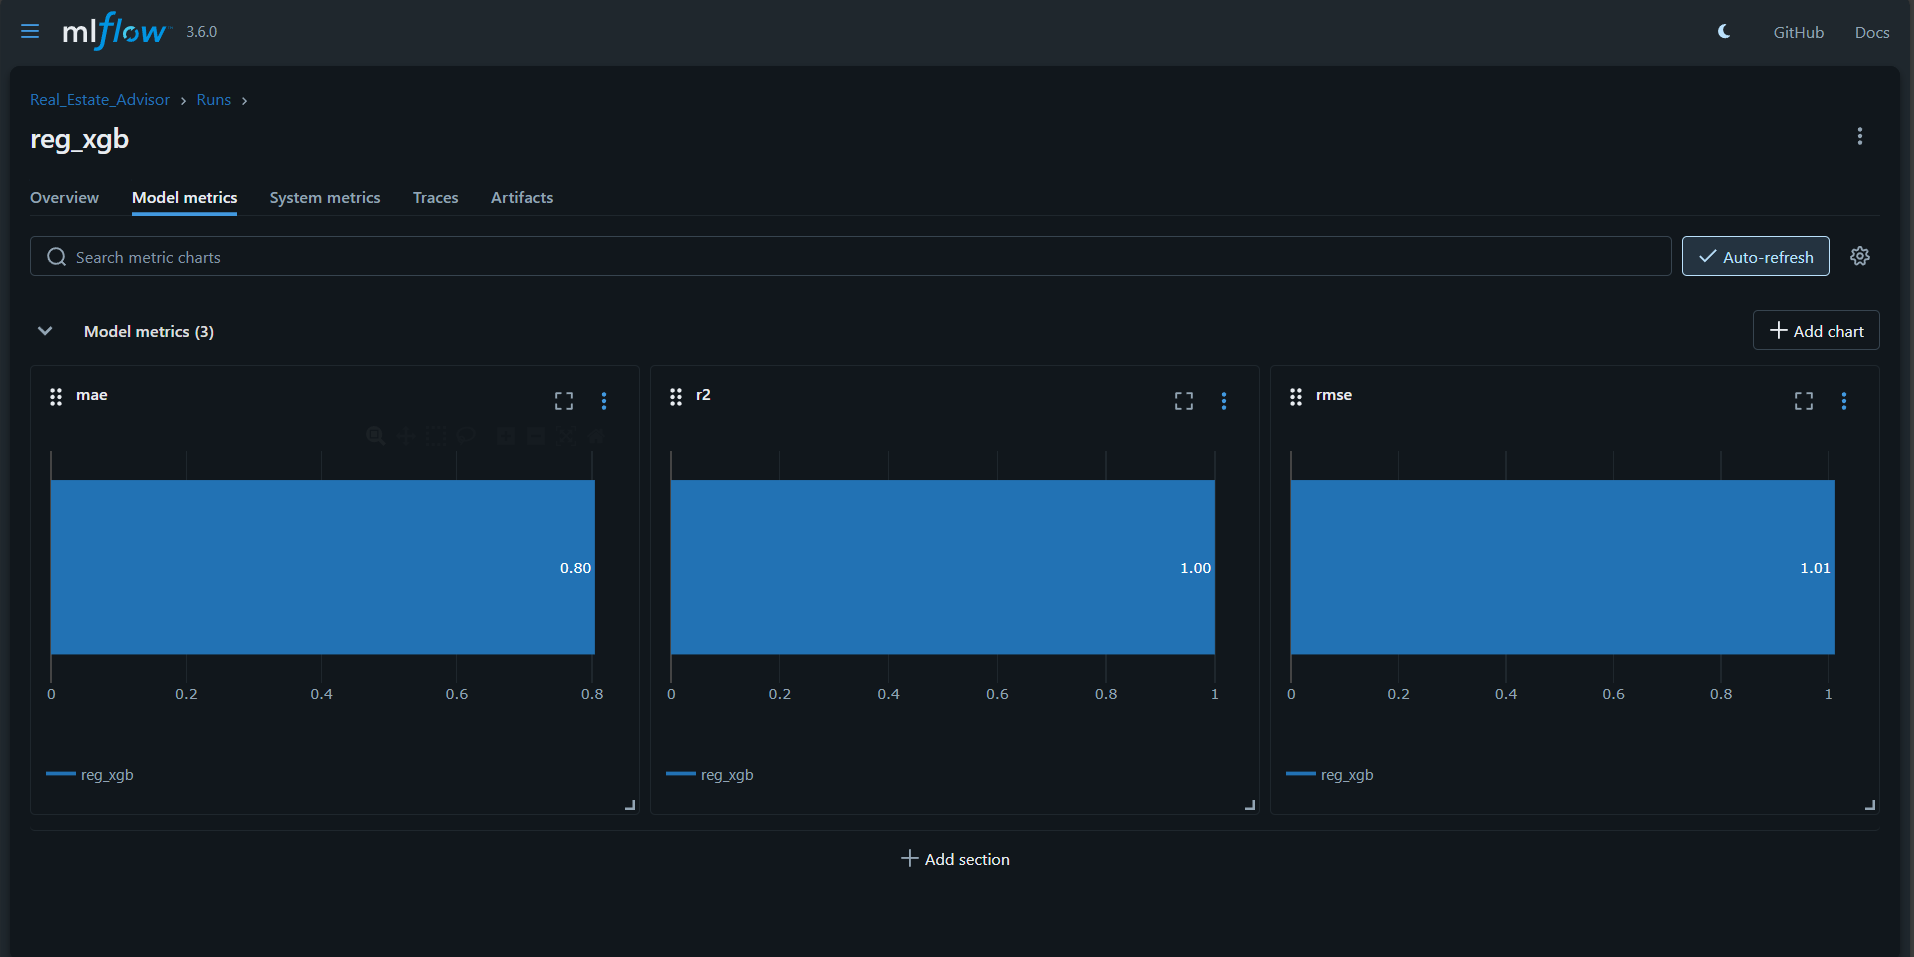

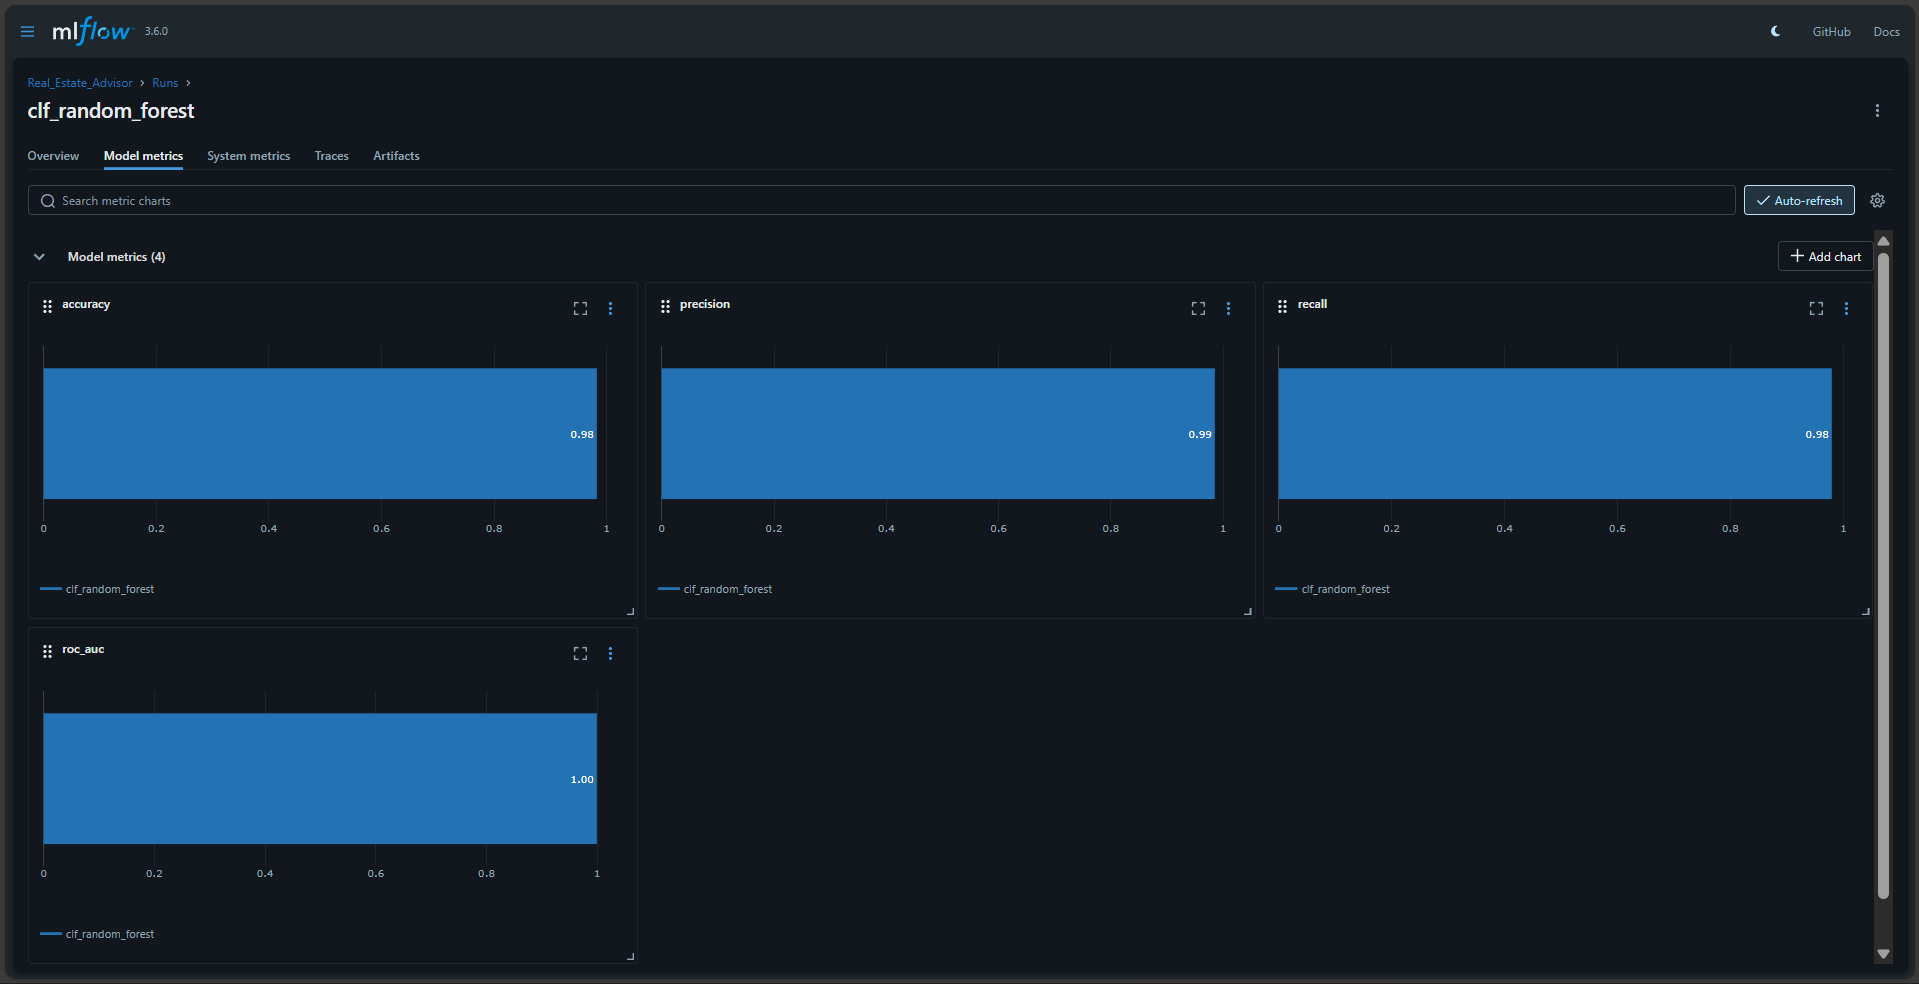

### ***Conclusion***

This project brings together exploratory analysis, feature engineering, predictive modeling, and deployment planning to build a data-driven Real Estate Investment Advisor. The EDA offered a broad overview of pricing behavior across regions, property characteristics, and amenities. While several features showed uniform distribution due to dataset structure, the analysis still revealed meaningful relationships—such as size correlating with price, property age showing mild patterns, and public transport accessibility having a subtle influence on perceived investment potential. Amenities, facing direction, and furnishing levels demonstrated marginal pricing effects, suggesting that location and core structural features dominate valuation.

Feature engineering steps such as Price per SqFt, Space per BHK, and Infrastructure Score significantly strengthened the dataset’s predictive capacity. These engineered features contributed directly to the performance of both downstream models. The classification model for identifying “good investments” achieved very strong accuracy, precision, recall, and ROC-AUC values, indicating that it can reliably distinguish promising properties from weaker prospects. The regression model, designed to estimate future property prices, produced exceptionally low error values and an R² score approaching 1. This suggests that the model captures nearly all variance in the target variable, making its forecasts highly reliable within the context of the dataset.

Finally, the project includes preparation for real-world deployment through MLflow logging and Streamlit integration. This allows the trained models to be packaged into a user-friendly tool capable of delivering investment insights and price predictions for any property input.

Overall, this workflow demonstrates a complete pipeline—from understanding raw data to generating actionable intelligence. The results show that machine learning can serve as a powerful support system for real estate decision-making when paired with thoughtful feature design and proper model governance.